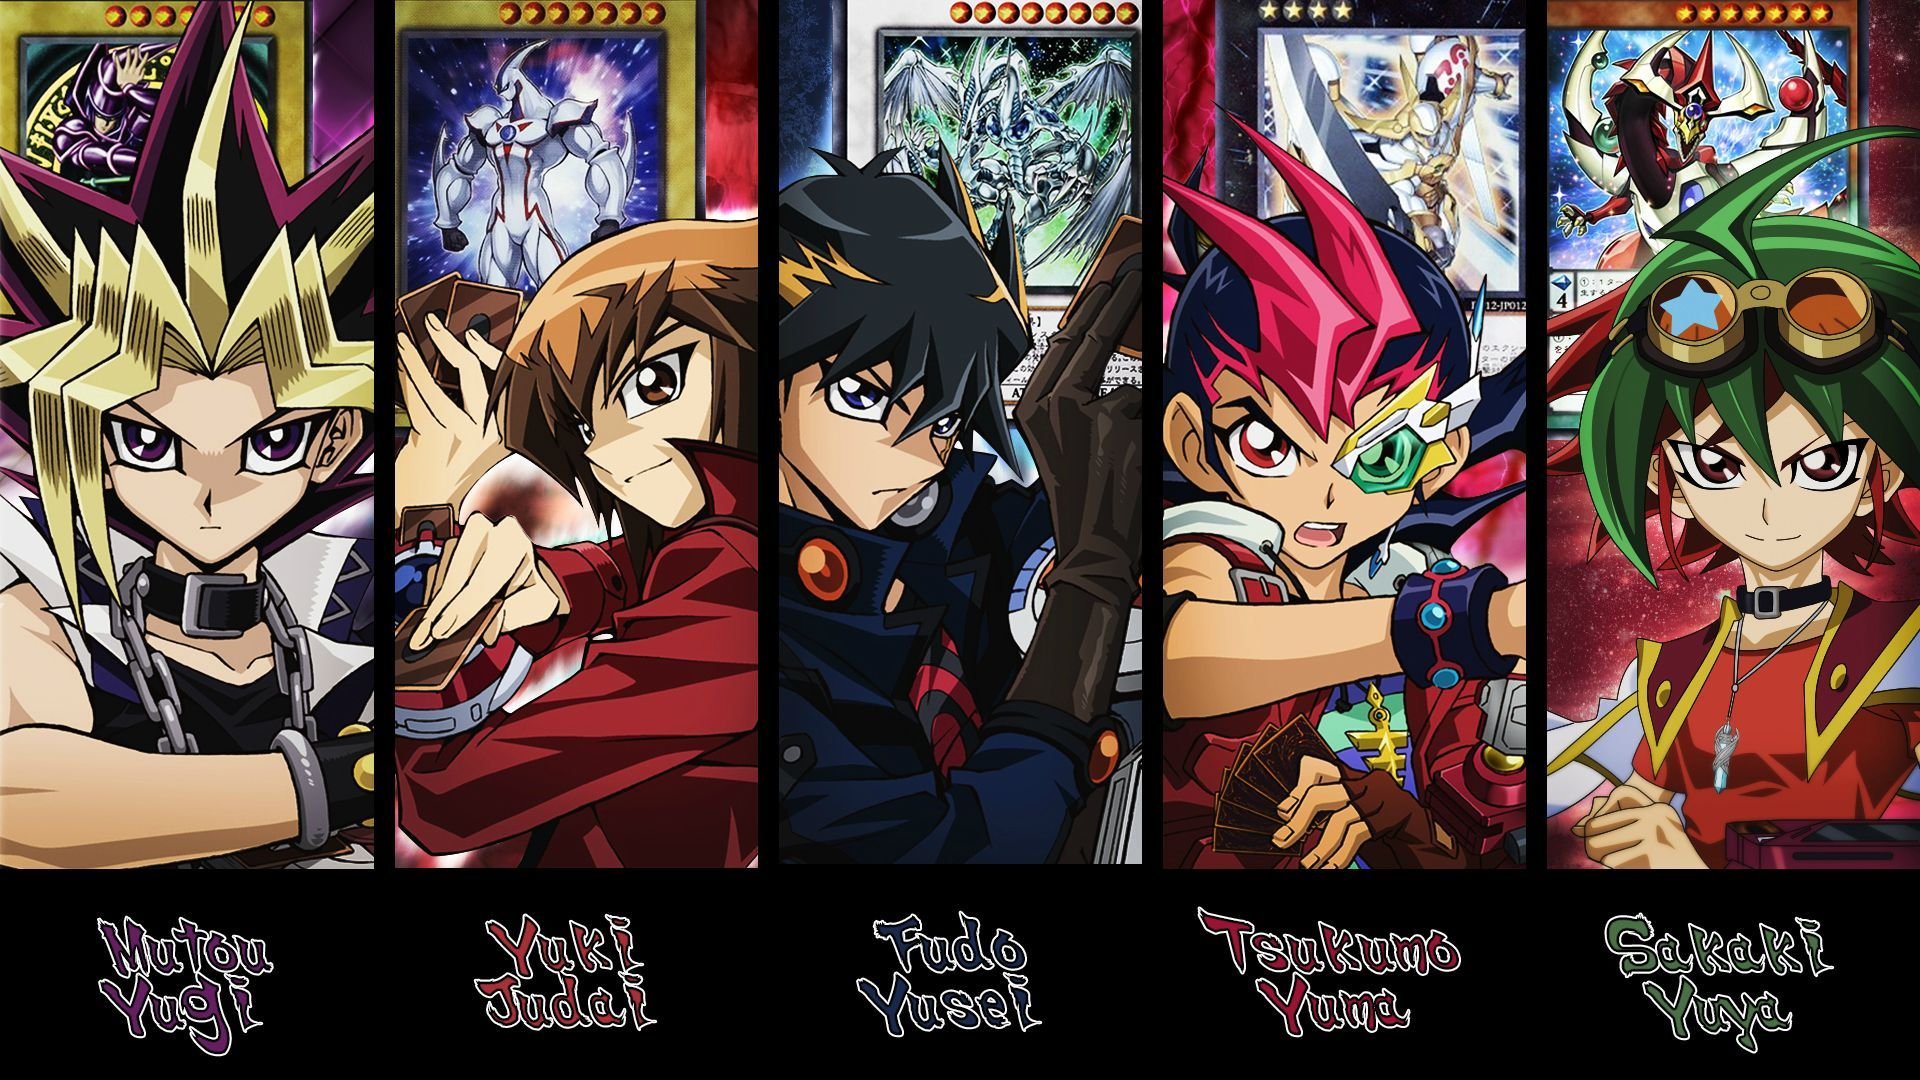

In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [167]:
Cards = pd.read_csv('/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/card_data.csv')
Cards.head()

,Name,Type,Level,Race,Attribute,ATK,DEF
0,Limit Reverse,Trap Card,NaN,Continuous,NaN,NaN,NaN
1,The 13th Grave,Normal Monster,3.0,Zombie,DARK,1200.0,900.0
2,Gem-Enhancement,Trap Card,NaN,Normal,NaN,NaN,NaN
3,Magician's Circle,Trap Card,NaN,Normal,NaN,NaN,NaN
4,Castle of Dark Illusions,Flip Effect Monster,4.0,Fiend,DARK,920.0,1930.0


# ***Data Exploring***

In [168]:
Cards.drop_duplicates()

,Name,Type,Level,Race,Attribute,ATK,DEF
0,Limit Reverse,Trap Card,NaN,Continuous,NaN,NaN,NaN
1,The 13th Grave,Normal Monster,3.0,Zombie,DARK,1200.0,900.0
2,Gem-Enhancement,Trap Card,NaN,Normal,NaN,NaN,NaN
3,Magician's Circle,Trap Card,NaN,Normal,NaN,NaN,NaN
4,Castle of Dark Illusions,Flip Effect Monster,4.0,Fiend,DARK,920.0,1930.0
...,...,...,...,...,...,...,...
6518,Cyberdark Claw,Effect Monster,3.0,Dragon,DARK,1600.0,800.0
6519,Cyberdark Inferno,Spell Card,NaN,Field,NaN,NaN,NaN
6520,Lost World,Spell Card,NaN,Field,NaN,NaN,NaN
6521,Performapal Odd-Eyes Minitaurus,Pendulum Effect Monster,4.0,Beast-Warrior,DARK,1200.0,1600.0


In [169]:
Cards.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6529     True
6530     True
6531     True
6532     True
6533     True
Length: 6534, dtype: bool

In [170]:
Cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6534 entries, 0 to 6533
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       6534 non-null   object 
 1   Type       6534 non-null   object 
 2   Level      4275 non-null   float64
 3   Race       6534 non-null   object 
 4   Attribute  4275 non-null   object 
 5   ATK        4275 non-null   float64
 6   DEF        4275 non-null   float64
dtypes: float64(3), object(4)
memory usage: 357.5+ KB


In [171]:
Cards.isnull().sum()

Name            0
Type            0
Level        2259
Race            0
Attribute    2259
ATK          2259
DEF          2259
dtype: int64

In [172]:
another1 = Cards.loc[Cards['Level'].isnull(),['Race']].value_counts()
another1

Race        
Normal          1126
Continuous       445
Quick-Play       187
Equip            161
Field            120
Counter           89
Ritual            44
Fiend             17
Beast             14
Plant             12
Machine            9
Fairy              5
Warrior            4
Insect             3
Zombie             3
Pyro               3
Winged Beast       3
Aqua               3
Rock               2
Dinosaur           2
Spellcaster        2
Thunder            2
Wyrm               1
Reptile            1
Dragon             1
dtype: int64

In [173]:
Cards.fillna(value=0, inplace=True)

In [174]:
Cards.dtypes

Name          object
Type          object
Level        float64
Race          object
Attribute     object
ATK          float64
DEF          float64
dtype: object

# Converting Data and Replacing Values 

In [175]:
convert_dict = {'ATK': int, 
                'Level': float,
                'DEF': int
               }
Cards = Cards.astype(convert_dict)

In [176]:
Cards

,Name,Type,Level,Race,Attribute,ATK,DEF
0,Limit Reverse,Trap Card,0.0,Continuous,0,0,0
1,The 13th Grave,Normal Monster,3.0,Zombie,DARK,1200,900
2,Gem-Enhancement,Trap Card,0.0,Normal,0,0,0
3,Magician's Circle,Trap Card,0.0,Normal,0,0,0
4,Castle of Dark Illusions,Flip Effect Monster,4.0,Fiend,DARK,920,1930
...,...,...,...,...,...,...,...
6529,Wattcancel,Trap Card,0.0,Counter,0,0,0
6530,Paleozoic Anomalocaris,XYZ Monster,2.0,Aqua,WATER,2400,0
6531,Dark Magician,Normal Monster,7.0,Spellcaster,DARK,2500,2100
6532,Odd-Eyes Pendulum Dragon,Pendulum Effect Monster,7.0,Dragon,DARK,2500,2000


In [177]:
Cards['Attribute'] = Cards['Attribute'].replace(0, 'Other')

In [178]:
Cards['Attribute'] = Cards['Attribute'].replace('', 'Other')
Cards

,Name,Type,Level,Race,Attribute,ATK,DEF
0,Limit Reverse,Trap Card,0.0,Continuous,Other,0,0
1,The 13th Grave,Normal Monster,3.0,Zombie,DARK,1200,900
2,Gem-Enhancement,Trap Card,0.0,Normal,Other,0,0
3,Magician's Circle,Trap Card,0.0,Normal,Other,0,0
4,Castle of Dark Illusions,Flip Effect Monster,4.0,Fiend,DARK,920,1930
...,...,...,...,...,...,...,...
6529,Wattcancel,Trap Card,0.0,Counter,Other,0,0
6530,Paleozoic Anomalocaris,XYZ Monster,2.0,Aqua,WATER,2400,0
6531,Dark Magician,Normal Monster,7.0,Spellcaster,DARK,2500,2100
6532,Odd-Eyes Pendulum Dragon,Pendulum Effect Monster,7.0,Dragon,DARK,2500,2000


# Basic Graphing

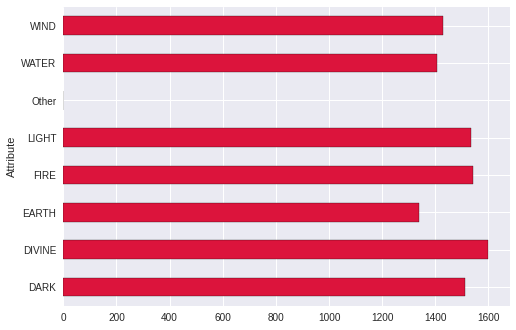

In [179]:
Cards.groupby('Attribute')['ATK'].mean().plot(kind='barh', color= 'Crimson', edgecolor='black');
#Shows the ATTCK for each Attribute

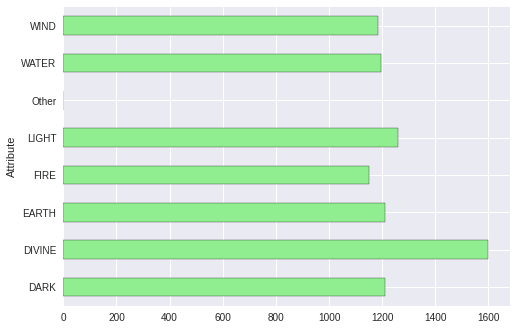

In [180]:
Cards.groupby('Attribute')['DEF'].mean().plot(kind='barh', color= 'lightgreen', edgecolor='black');
#Shows the DEF for each Attribute

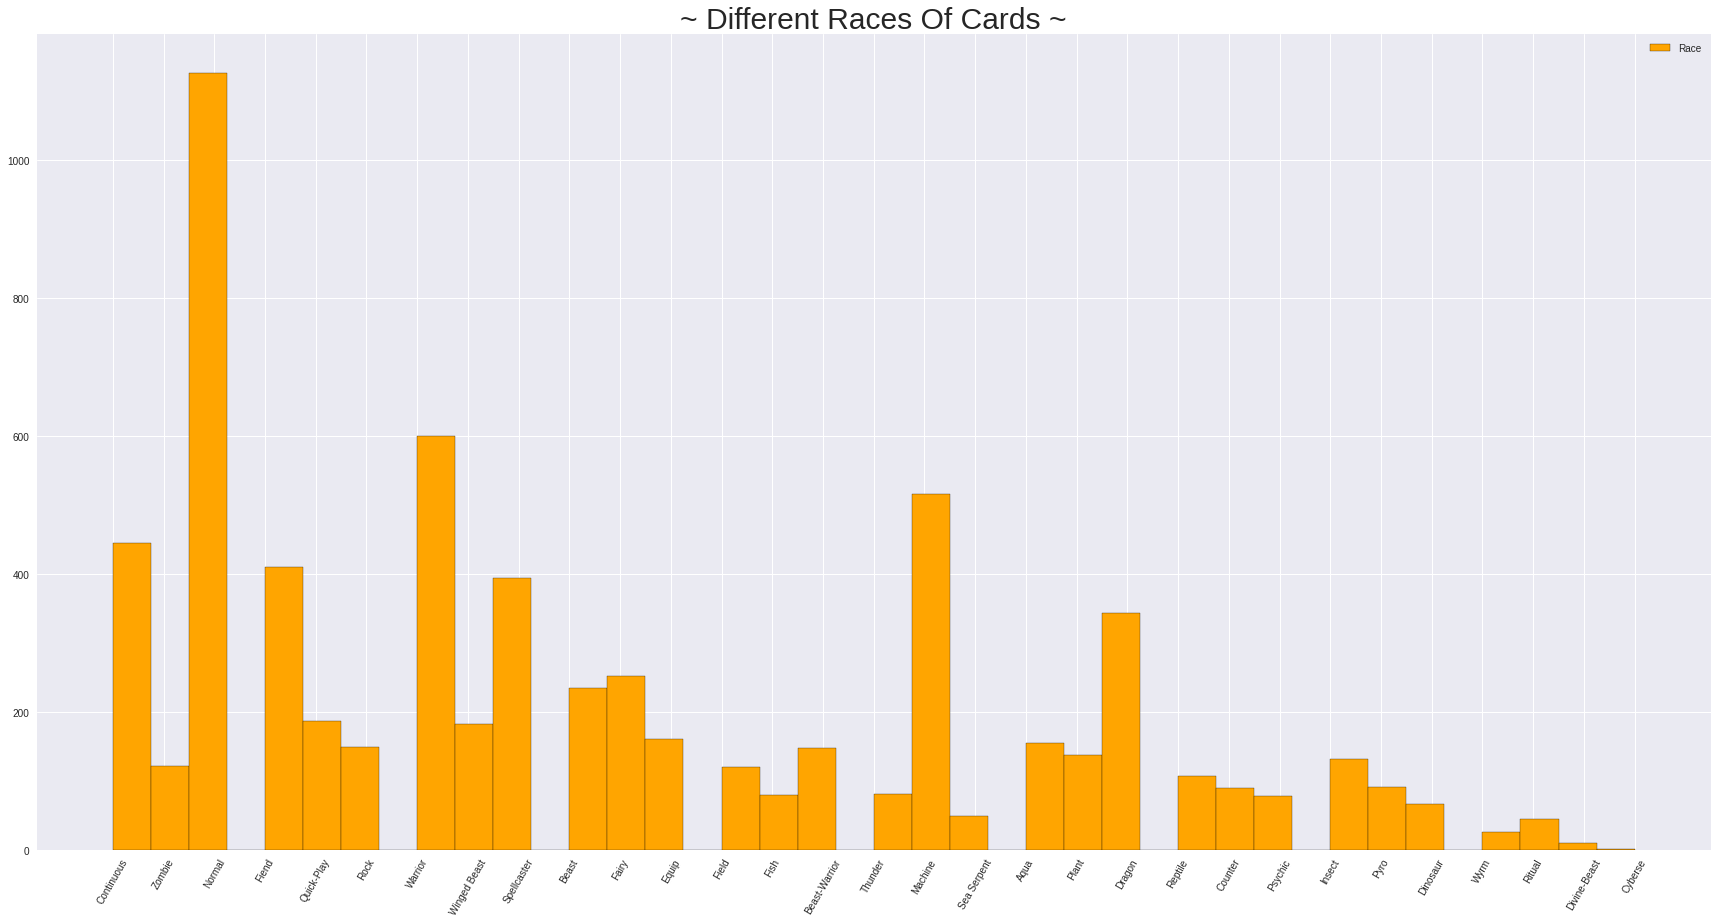

In [181]:
plt.style.use('seaborn')
Cards['Race'].hist(bins = 40,
  edgecolor='black', label='Race', color='orange', figsize=(30,15));
plt.xticks(rotation = 60);
plt.title('~ Different Races Of Cards ~', fontsize = 30);
plt.legend();

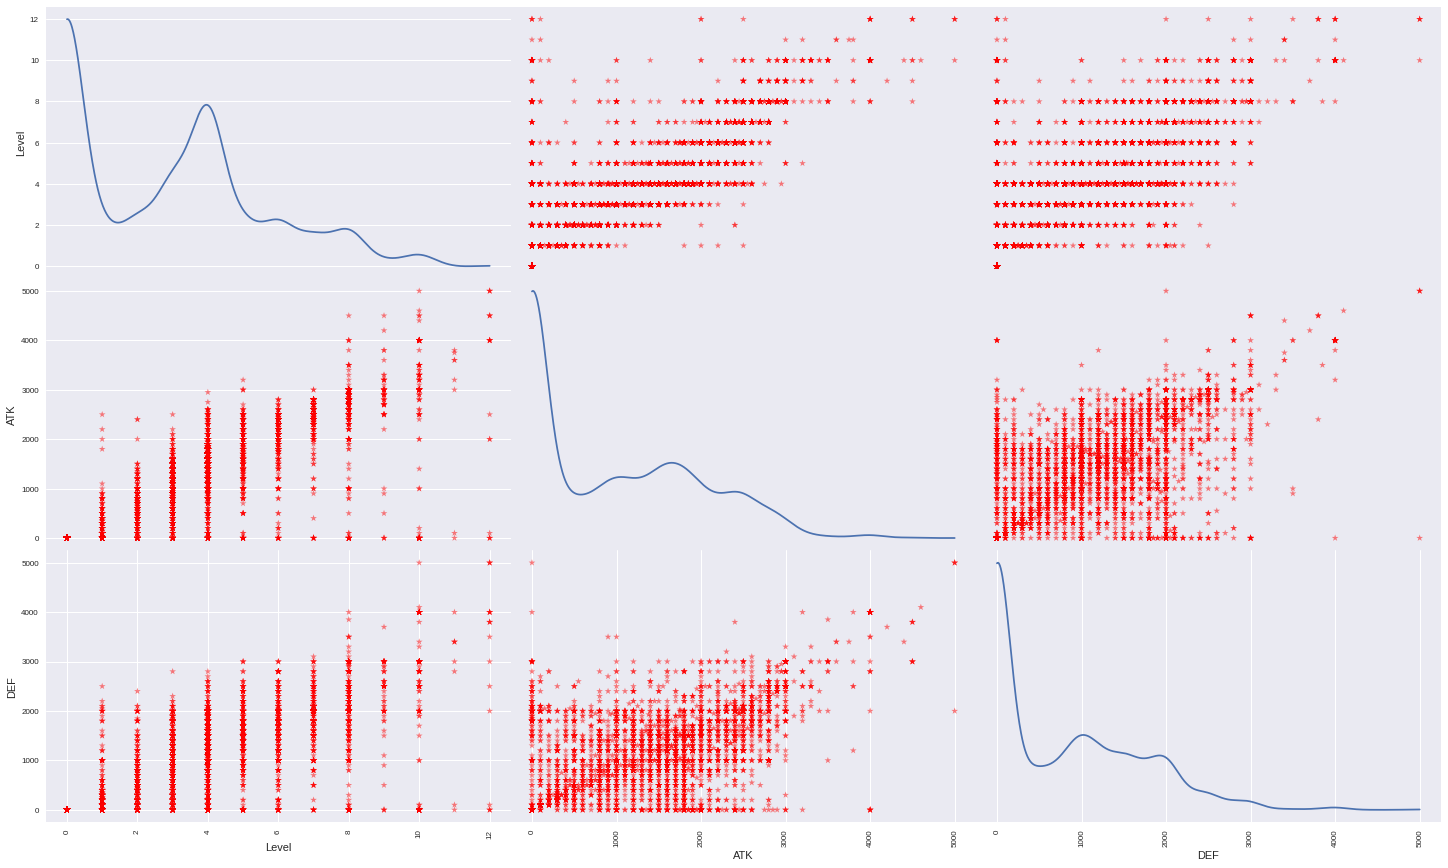

In [182]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
scatter_matrix(Cards, figsize=(25,15), grid=False, marker='*', diagonal='kde', range_padding=0.1, color= 'red')
pyplot.show()

# Machine Learning 

In [183]:
import math
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import kneighbors_graph
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [184]:
X = Cards.loc[:, ['Level',
           'ATK',
           'DEF']]
y = Cards['Type']

In [185]:
X.shape

(6534, 3)

In [186]:
y.shape

(6534,)

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [188]:
y_test.value_counts(normalize = True)

Effect Monster             0.384333
Spell Card                 0.179927
Trap Card                  0.159119
Normal Monster             0.082619
Tuner Monster              0.042840
Fusion Monster             0.030600
Synchro Monster            0.028152
XYZ Monster                0.026316
Flip Effect Monster        0.014076
Pendulum Effect Monster    0.012240
Gemini Monster             0.008568
Token                      0.008568
Pendulum Normal Monster    0.006120
Ritual Effect Monster      0.005508
Union Effect Monster       0.003672
Ritual Monster             0.003060
Spirit Monster             0.002448
Synchro Tuner Monster      0.001224
Toon Monster               0.000612
Name: Type, dtype: float64

In [189]:
# Standardize Data
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [190]:
#peaking at the data
print(X_train)

[[ 0.38753289 -0.95902634  1.39743105]
 [ 0.02555974 -0.661512   -0.68804343]
 [ 1.11147919 -0.95902634  1.86086982]
 ...
 [ 1.83542549  1.52025981  1.39743105]
 [ 0.38753289  0.03268812  1.16571166]
 [ 0.74950604  0.82605969  0.93399227]]


In [191]:
#peaking at the data
print(X_test)

[[-1.06035972 -0.95902634 -0.91976281]
 [ 0.38753289  0.6277168   0.5864132 ]
 [ 2.5593718   2.31363138  2.55602798]
 ...
 [ 0.74950604  1.02440258  0.4705535 ]
 [-1.06035972 -0.95902634 -0.91976281]
 [ 0.38753289  0.52854535  0.12297442]]


In [192]:
#peaking at the data
print(y_train)

5116             Effect Monster
5229             Effect Monster
2986             Effect Monster
1307    Pendulum Effect Monster
5483             Effect Monster
                 ...           
5235             Effect Monster
1105             Effect Monster
6003             Fusion Monster
778              Effect Monster
6528             Fusion Monster
Name: Type, Length: 4900, dtype: object


In [193]:
#peaking at the data
print(y_test)

4276         Spell Card
2731     Effect Monster
5389    Synchro Monster
2611        XYZ Monster
2355     Effect Monster
             ...       
5144          Trap Card
5904         Spell Card
1208     Effect Monster
4830         Spell Card
5224     Effect Monster
Name: Type, Length: 1634, dtype: object


In [194]:
log_reg = LogisticRegression()
ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)

print('Training accuracy:', ovo.score(X_train, y_train));
print('Test accuracy:', ovo.score(X_test, y_test));

Training accuracy: 0.5620408163265306
Test accuracy: 0.5648714810281518


In [195]:
cl = LogisticRegression()
cl.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [196]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,cl.predict(X_test))
print(cm)

[[615   0  10   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    2]
 [ 23   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [ 41   0   6   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0
    0]
 [ 14   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [135   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [ 20   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [ 10   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  8   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0 294   0   0   0   0   0   0   0   0
    0]
 [  4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [ 40   0   6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  2   0   0   0   0   0   

In [197]:
from sklearn.svm import SVC
cl = SVC(kernel="rbf")
cl.fit(X_train,y_train)

cm = confusion_matrix(y_test,cl.predict(X_test))
print(cm)

[[626   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    2]
 [ 23   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [ 49   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [ 14   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [135   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [ 20   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [ 10   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0 294   0   0   0   0   0   0   0   0
    0]
 [  4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [ 46   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  2   0   0   0   0   0   

In [198]:
log_reg = LogisticRegression(penalty='l1',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 0.5659183673469388
Test accuracy: 0.5691554467564259


In [199]:
log_reg.predict_proba(X_test)[:,1]

array([0.01461438, 0.02254862, 0.00811533, ..., 0.01385737, 0.01461438,
       0.01926059])

In [200]:
log_reg.intercept_

array([ -0.54418274,  -4.02779524,  -4.47933303,  -5.61628996,
        -2.49082706,  -6.42514075,  -4.12505075,  -7.80343469,
        -6.02082344,  -7.80343469,  -5.88113424,  -7.1047254 ,
       -10.84842403,  -5.60777819,  -4.47898724,  -7.92186163,
        -6.4059687 ,  -7.20042867,  -6.54637681, -10.25050102,
        -3.38847789,  -5.65061264,  -4.65346668,  -7.9218663 ])

In [201]:
log_reg.coef_

array([[ 1.16965116e+00, -1.11418074e-01, -1.77408657e-01],
       [ 9.11771156e-02, -7.48250009e-01,  5.62795225e-01],
       [ 1.26452286e+00,  1.32085432e-01,  2.39226987e-01],
       [ 3.06224482e-01,  3.25988776e-01, -1.99230357e-01],
       [ 0.00000000e+00, -3.36428680e-03,  3.93420849e-01],
       [ 0.00000000e+00, -2.89719343e-01,  6.34002704e-01],
       [ 4.52266741e-01, -1.62110723e-02,  1.01521641e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  8.84079976e-01, -2.26261480e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.52106919e-01,  5.23904656e-01,  0.00000000e+00],
       [ 5.88313239e-01,  2.98065404e-01,  2.73514892e-01],
       [-1.01453556e+01,  0.00000000e+00, -1.85997193e-01],
       [ 0.00000000e+00,  0.00000000e+00,  4.44371779e-01],
       [ 1.07047802e+00,  5.29118322e-01, -3.68596761e-02],
       [ 0.00000000e+00,  2.96411211e-01,  1.98709030e-01],
       [ 0.00000000e+00,  4.46378340e-01

In [202]:
log_reg.predict_proba(X_test[0:1])

array([[1.36030573e-01, 1.46143755e-02, 1.57949307e-03, 1.73914621e-03,
        4.12796494e-02, 8.99846973e-04, 7.58355741e-03, 3.07969107e-04,
        9.64867031e-04, 3.07969107e-04, 6.37756344e-04, 1.93952807e-04,
        3.92415213e-01, 1.83520663e-03, 1.70950461e-03, 1.71523811e-04,
        8.11357872e-04, 3.14057609e-02, 4.48301870e-04, 3.25522793e-01,
        3.11875940e-02, 2.44001991e-03, 5.74204715e-03, 1.71522235e-04]])

In [203]:
log_reg.predict(X_test[0:1])

array(['Spell Card'], dtype=object)

In [204]:
log_reg.score(X_test, y_test)

0.5691554467564259

#  Linear regression / Kmean

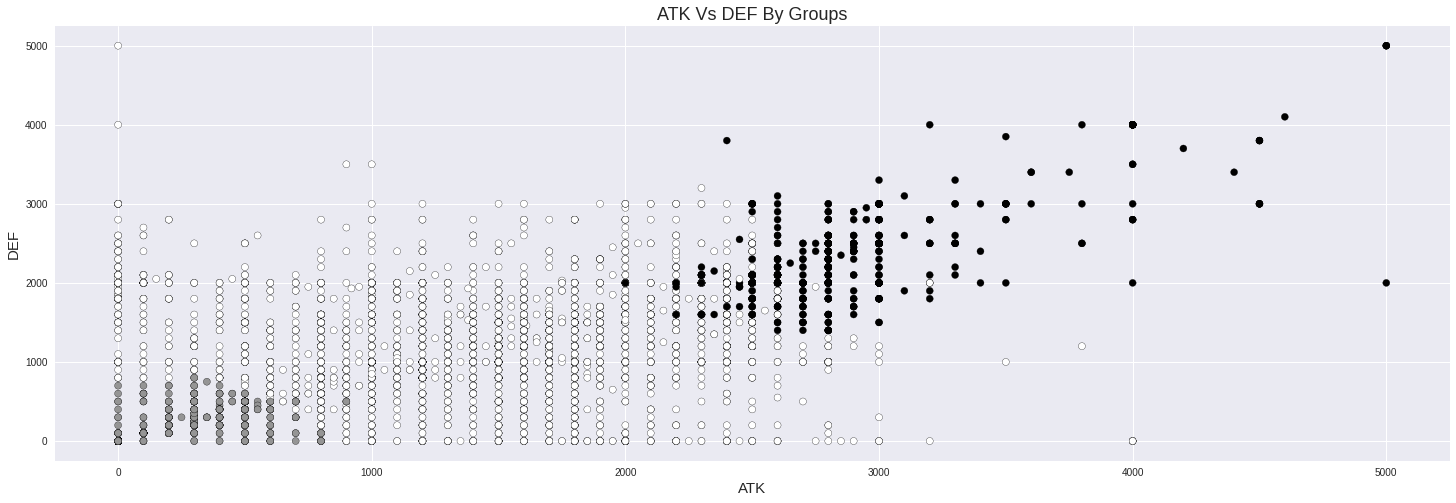

In [310]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
scaled_df = scaler.fit_transform(X)
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)

hc = AgglomerativeClustering(n_clusters = 3)
hc.fit(scaled_df)
# Save the cluster lables to the dataframe 
Cards['cluster'] = hc.labels_



plt.figure(figsize=(25, 8))
plt.scatter(Cards['ATK'], Cards['DEF'], c = Cards['cluster'], edgecolors='Black')
plt.title('ATK Vs DEF By Groups', fontsize=18);
plt.xlabel('ATK', fontsize=15)
plt.ylabel('DEF', fontsize=15)
plt.show()


In [206]:
x = pd.DataFrame(Cards['ATK'])
yy = pd.DataFrame(Cards['DEF'])

In [207]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x, yy, test_size=0.25)

In [208]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(4900, 1)
(1634, 1)
(4900, 1)
(1634, 1)


In [241]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, yy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [242]:
regressor = LinearRegression().fit(x, yy)

In [244]:
rsq = regressor.score(x, yy)

In [246]:
print('coefficient of determination:', rsq)

coefficient of determination: 0.5373619304606319


In [247]:
print('intercept:', regressor.intercept_)

intercept: [189.35828966]


In [248]:
print('slope:', regressor.coef_)

slope: [[0.63405372]]


In [251]:
y_pred = regressor.predict(x)

In [253]:
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 189.35828966]
 [ 950.22275428]
 [ 189.35828966]
 ...
 [1774.49259094]
 [1774.49259094]
 [1774.49259094]]


In [254]:
y_pred = regressor.intercept_ + regressor.coef_ * x
print('predicted response:', y_pred, sep='\n')

predicted response:
              ATK
0      189.358290
1      950.222754
2      189.358290
3      189.358290
4      772.687713
...           ...
6529   189.358290
6530  1711.087219
6531  1774.492591
6532  1774.492591
6533  1774.492591

[6534 rows x 1 columns]


In [256]:
import statsmodels.api as sm
model = sm.OLS(yy, x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [258]:
x = sm.add_constant(x)

In [260]:
model = sm.OLS(yy, x)

In [261]:
results = model.fit()

In [262]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    DEF   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     7587.
Date:                Tue, 02 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:36:38   Log-Likelihood:                -50967.
No. Observations:                6534   AIC:                         1.019e+05
Df Residuals:                    6532   BIC:                         1.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        189.3583     10.073     18.798      0.0

In [265]:
#rsquared holds 𝑅²
print('coefficient of determination:', results.rsquared)
print()
#rsquared_adj represents adjusted 𝑅² (𝑅² corrected according to the number of input features)
print('adjusted coefficient of determination:', results.rsquared_adj)
print()
#params refers the array with 𝑏₀, 𝑏₁, and 𝑏₂
print('regression coefficients:', results.params)


coefficient of determination: 0.5373619304606334

adjusted coefficient of determination: 0.537291104056846

regression coefficients: const    189.358290
ATK        0.634054
dtype: float64


In [266]:
print('predicted response:', results.fittedvalues, sep='\n')
print()
print('predicted response:', results.predict(x), sep='\n')

predicted response:
0        189.358290
1        950.222754
2        189.358290
3        189.358290
4        772.687713
           ...     
6529     189.358290
6530    1711.087219
6531    1774.492591
6532    1774.492591
6533    1774.492591
Length: 6534, dtype: float64

predicted response:
0        189.358290
1        950.222754
2        189.358290
3        189.358290
4        772.687713
           ...     
6529     189.358290
6530    1711.087219
6531    1774.492591
6532    1774.492591
6533    1774.492591
Length: 6534, dtype: float64
